In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

##### Overview the Data Set

(-0.5, 63.5, 63.5, -0.5)

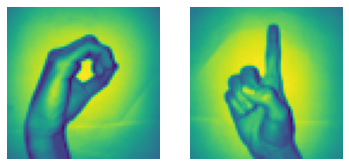

In [8]:
#data load
x_1 = np.load('X.npy')
y_1 = np.load('Y.npy')
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size,img_size))
plt.axis('off')

In [12]:
X = np.concatenate((x_1[204:409], x_1[822:1027]), axis = 0)

In [16]:
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis = 0).reshape(X.shape[0],1)

In [20]:
print(X)

[[[0.43529412 0.44705883 0.4509804  ... 0.41568628 0.40392157 0.39215687]
  [0.44705883 0.45882353 0.4627451  ... 0.42745098 0.41960785 0.40392157]
  [0.45490196 0.46666667 0.47843137 ... 0.4392157  0.43529412 0.42352942]
  ...
  [0.58431375 0.6039216  0.62352943 ... 0.5372549  0.52156866 0.5058824 ]
  [0.5411765  0.5568628  0.57254905 ... 0.5254902  0.5137255  0.5019608 ]
  [0.5176471  0.5372549  0.5529412  ... 0.5176471  0.5058824  0.49411765]]

 [[0.5137255  0.5254902  0.53333336 ... 0.46666667 0.45882353 0.4509804 ]
  [0.5254902  0.5372549  0.54509807 ... 0.4745098  0.47058824 0.45882353]
  [0.53333336 0.54509807 0.5529412  ... 0.48235294 0.4745098  0.4627451 ]
  ...
  [0.47843137 0.4862745  0.4862745  ... 0.41568628 0.40784314 0.4       ]
  [0.46666667 0.46666667 0.45882353 ... 0.40392157 0.39607844 0.3882353 ]
  [0.4509804  0.44705883 0.4392157  ... 0.39607844 0.3882353  0.3764706 ]]

 [[0.81960785 0.827451   0.83137256 ... 0.84313726 0.83137256 0.81960785]
  [0.827451   0.827451

In [25]:
# train, test set 만들기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_test + number_of_train)

410


In [29]:
#차원을 변경
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])

print(X_train_flatten.shape, X_test_flatten.shape)

(348, 4096) (62, 4096)


In [33]:
#행렬 전치
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

## Logistic Regression

In [34]:
[[impage.ongl(attachment:imgae.png)]]

SyntaxError: invalid syntax (<ipython-input-34-3fbb1f4a05e7>, line 1)

In [73]:
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter

result = dummy(5)

def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

In [74]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [75]:
sigmoid(100)

1.0

In [76]:
def forward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = np.sum(loss) / x_train[1]
    return cost

In [77]:
w, b = initialize_weights_and_bias(4096)
cost = forward_propagation(w, b, x_train, y_train)
print(cost)


[ 6156.545  10363.517   8402.852   5383.645   8235.907   9566.323
 10814.1045  9870.017   9421.379  10629.248   5866.1416  9077.533
  9792.3     8346.456   9948.977   9792.3     9144.279   8460.014
  9421.379   7921.159  10450.605   9792.3     5730.977   5225.3027
  8402.852   9715.797  10450.605   8636.264   9350.541   9421.379
  9640.48    9566.323   9077.533  10629.248   9566.323  10539.17
 10814.1045  9493.298   9493.298   8235.907   8636.264   9948.977
  9870.017  11732.283  10029.21   10363.517   9350.541   8883.015
  8517.959   5269.585   9350.541   9948.977   5454.4824  8636.264
  9011.754   9144.279   9212.015   8576.703   8128.2485  9566.323
  9212.015   8946.921   9715.797   9870.017  11409.377   9493.298
  8517.959  10450.605   9715.797   8883.015   9640.48    8460.014
 10110.748   9566.323   9421.379  10450.605   9421.379   8820.014
  5811.318  10539.17    8517.959   9280.761   9077.533   8820.014
 11005.505   8820.014   5407.0522  9566.323   9077.533   9077.533
  9566.323

## gradient descent

In [93]:
def forward_backward_propagation(w ,b ,x_train, y_train):
    z = np.dot(w.T , x_train)+b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    print(cost)
    #backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    print(derivative_weight)
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight":derivative_weight, "derivative_bias":derivative_bias }
    return cost , gradients

In [94]:
w, b = initialize_weights_and_bias(4096)
cost, derivative_dict = forward_backward_propagation(w, b, x_train, y_train)
print(derivative_dict['derivative_weight'])

14.014222401929988
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]


In [95]:
w = derivate_dict['derivative_weight']
b = derivate_dict['derivative_bias']
cost, derivate_dict = forward_backward_propagation(w, b, x_train, y_train)
print(cost)

nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan


In [96]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    #plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
Cost after iteration 0: nan
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]


nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
Cost after iteration 90: nan
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
nan
[[0.26381565]
 [0.2691909 ]

[[-2.15883799e-02]
 [-2.11961217e-02]
 [-2.06885658e-02]
 ...
 [ 4.50204235e-04]
 [ 5.73085712e-04]
 [ 9.22075098e-05]]
nan
[[-2.15957572e-02]
 [-2.12030090e-02]
 [-2.06955726e-02]
 ...
 [ 4.36393098e-04]
 [ 5.59965571e-04]
 [ 7.95565963e-05]]
nan
[[-2.16027733e-02]
 [-2.12095101e-02]
 [-2.07021915e-02]
 ...
 [ 4.22960472e-04]
 [ 5.47230889e-04]
 [ 6.72828586e-05]]
nan
[[-2.16095284e-02]
 [-2.12157278e-02]
 [-2.07085273e-02]
 ...
 [ 4.09815387e-04]
 [ 5.34792386e-04]
 [ 5.52988061e-05]]
nan
[[-2.16160854e-02]
 [-2.12217268e-02]
 [-2.07146458e-02]
 ...
 [ 3.96901628e-04]
 [ 5.22594883e-04]
 [ 4.35502228e-05]]
nan
[[-2.16224794e-02]
 [-2.12275431e-02]
 [-2.07205837e-02]
 ...
 [ 3.84188995e-04]
 [ 5.10608700e-04]
 [ 3.20077677e-05]]
nan
[[-2.16287245e-02]
 [-2.12331913e-02]
 [-2.07263557e-02]
 ...
 [ 3.71666459e-04]
 [ 4.98822923e-04]
 [ 2.06604013e-05]]
Cost after iteration 190: nan
nan
[[-2.16348202e-02]
 [-2.12386713e-02]
 [-2.07319614e-02]
 ...
 [ 3.59336753e-04]
 [ 4.87240078e-04]
 [

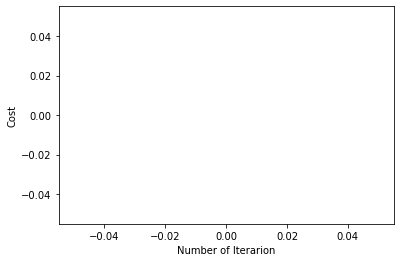

In [97]:
parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [98]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

In [101]:
predict(parameters["weight"],parameters["bias"], x_test)

ValueError: operands could not be broadcast together with shapes (1,62) (348,) 

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

14.014222401929988
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
Cost after iteration 0: 14.014222
9.140081693931261
[[0.26381564]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135677]
 [0.23780707]
 [0.23305161]]
4.266205301126091
[[0.26371705]
 [0.26909016]
 [0.27399014]
 ...
 [0.24126774]
 [0.23771941]
 [0.23296579]]
0.869611162147216
[[-0.15073577]
 [-0.15338523]
 [-0.1558938 ]
 ...
 [-0.13329485]
 [-0.13093328]
 [-0.1282682 ]]
2.1461958243990216
[[0.25714927]
 [0.26238519]
 [0.26715825]
 ...
 [0.235319  ]
 [0.2318647 ]
 [0.22723364]]
2.6310512382435762
[[-0.27016761]
 [-0.27514654]
 [-0.27981398]
 ...
 [-0.24170342]
 [-0.23764123]
 [-0.23280359]]
2.337129506388679
[[0.25951991]
 [0.26480459]
 [0.26962276]
 ...
 [0.2374533 ]
 [0.23396548]
 [0.22929099]]
2.4223533227717557
[[-0.26891865]
 [-0.27387267]
 [-0.27851686]
 ...
 [-0.24058148]
 [-0.23653644]
 [-0.23172139]]
2.4630561998129075
[[0.26063618]
 [0.26594398]
 [0.2707835 ]
 ...
 [0.23845803]


[[-0.2128898 ]
 [-0.21693538]
 [-0.22068512]
 ...
 [-0.19243196]
 [-0.18909303]
 [-0.18514463]]
1.1419012122436498
[[0.21461997]
 [0.21898919]
 [0.22291723]
 ...
 [0.19308874]
 [0.19040345]
 [0.18675744]]
1.0063321356453654
[[-0.2078425 ]
 [-0.21180402]
 [-0.21547176]
 ...
 [-0.1880727 ]
 [-0.18479964]
 [-0.1809309 ]]
1.0875391810383
[[0.20979416]
 [0.21406418]
 [0.21789498]
 ...
 [0.18844632]
 [0.18584423]
 [0.18229772]]
0.9625644020653619
[[-0.20235283]
 [-0.20622211]
 [-0.20980021]
 ...
 [-0.18332593]
 [-0.18012492]
 [-0.17634328]]
1.031918556597135
[[0.204527  ]
 [0.20868862]
 [0.21241334]
 ...
 [0.18340022]
 [0.18088812]
 [0.1774487 ]]
Cost after iteration 90: 1.031919
0.917414149232922
[[-0.19638264]
 [-0.20015065]
 [-0.20363079]
 ...
 [-0.17815691]
 [-0.17503475]
 [-0.1713484 ]]
0.9750585066196659
[[0.19877443]
 [0.20281751]
 [0.20642656]
 ...
 [0.17791269]
 [0.17549784]
 [0.17217375]]
0.8708523496097103
[[-0.18989018]
 [-0.19354693]
 [-0.19691998]
 ...
 [-0.17252733]
 [-0.16949

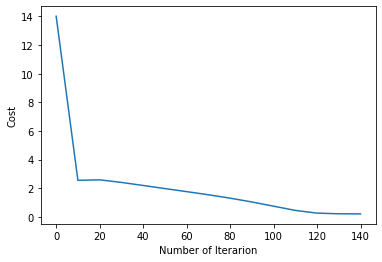

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [100]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [104]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)

In [105]:
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


In [106]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [107]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [114]:
initialize_weights_and_bias

<function __main__.initialize_weights_and_bias(dimension)>

In [115]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [116]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [117]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    return parameters

In [118]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 0.344046
Cost after iteration 100: 0.337203
Cost after iteration 200: 0.335817
Cost after iteration 300: 0.306064
Cost after iteration 400: 0.264294
Cost after iteration 500: 0.224637
Cost after iteration 600: 0.191285
Cost after iteration 700: 0.163747
Cost after iteration 800: 0.143496
Cost after iteration 900: 0.163733
Cost after iteration 1000: 0.110016
Cost after iteration 1100: 0.098300
Cost after iteration 1200: 0.089511
Cost after iteration 1300: 0.079916
Cost after iteration 1400: 0.071968
Cost after iteration 1500: 0.065150
Cost after iteration 1600: 0.059467
Cost after iteration 1700: 0.054752
Cost after iteration 1800: 0.050690
Cost after iteration 1900: 0.047002
Cost after iteration 2000: 0.043444
Cost after iteration 2100: 0.039880
Cost after iteration 2200: 0.036578
Cost after iteration 2300: 0.033907
Cost after iteration 2400: 0.031769


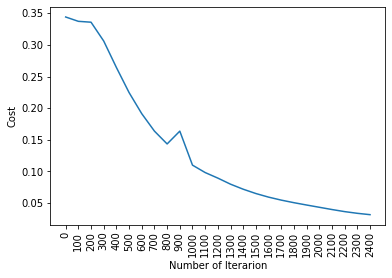

train accuracy: 100.0 %
test accuracy: 95.16129032258064 %


In [119]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [121]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [122]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5303
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5598
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5592
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5567
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5871
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5733
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5641
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5579
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5210
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5656
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.9687
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9606
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.9603
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9503
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9708
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9646
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9658
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.9634
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2582 - accuracy: 0.9666
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.9660
Epoch 94/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.9791
Epoch 67/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.9510
Epoch 68/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.9787
Epoch 69/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.9594
Epoch 70/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.9665
Epoch 71/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.9713
Epoch 72/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9764
Epoch 73/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.9830
Epoch 74/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.9624
Epoch 75/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.9526
Epoch 76/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.9764
Epoch 49/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.9848
Epoch 50/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.9833
Epoch 51/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.9695
Epoch 52/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.9732
Epoch 53/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2449 - accuracy: 0.9727
Epoch 54/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9559
Epoch 55/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9760
Epoch 56/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9803
Epoch 57/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9790
Epoch 58/100
8/8 [===============

In [123]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()